In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
regions = ["1000_11000_10k", "95000_105000_10k", "100000_110000_10k", "150000_160000_10k", "221000_231000_10k", "218320_224090_5k","gaussian_noise_95_105"]

In [84]:
K = 6
region = regions[2]

In [85]:
Y_real = np.loadtxt("../data/input/Y_bin_{}.txt".format(region))
Y = np.loadtxt("../data/preliminary_results/{}/pred_map_1000_{}_{}.txt".format(region,K,region))

In [86]:
N = len(Y[0,:])
n_iterations = int(len(Y[:,0])/N)


In [87]:
Y[0,0]

0.0

In [88]:
cont = np.zeros(N-1)
cont_pred = np.zeros((n_iterations,N-1))
for r in range(N-1):
    for i in range(N-r-1):
        cont[r] += Y_real[i,i+r+1]
    cont[r] /= N-r
cont = cont/cont[1]
    
for iter in range(n_iterations):
    for r in range(N-1):
        for i in range(N-r-1):
            cont_pred[iter,r] += Y[i+iter*N,i+r+1]
        cont_pred[iter,r] /= N-r
    cont_pred[iter,:] = cont_pred[iter,:]/cont_pred[iter,1]

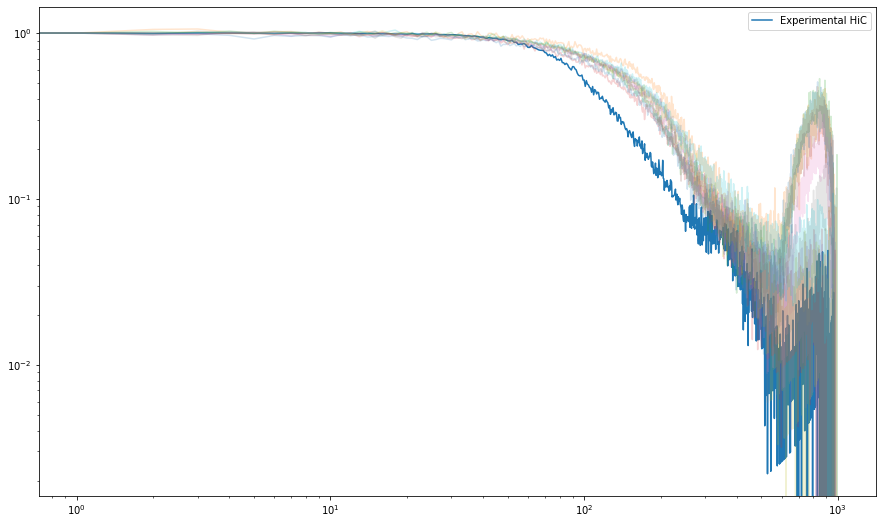

In [89]:
plt.figure(figsize=(15,9))
plt.loglog(cont, label="Experimental HiC")
plt.loglog(np.transpose(cont_pred), alpha = 0.2)
plt.legend()